In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('inadvance_synth.csv', sep=';', index_col=0)
df.head(3)

,age,barthel,charlson,codidiagingreso,codservicioreal,creatinina,drg,estancias,glucosa,hematocrito,...,metastatic_tumor,num_grupoact3_HOSP,numurgenciasprevias,potasio,proteina_c_reactiva,rdw_cv,rdw_sd,sodio,urea,label
0,80,NaN,4.0,NaN,HNEM,0.42,141.0,7.0,110.0,29.548684,...,0.0,NaN,6.0,4.653334,NaN,24.9,83.1,145.0,NaN,0.0
1,67,NaN,5.0,NaN,HNEF,NaN,444.0,11.0,NaN,30.648684,...,0.0,NaN,1.0,NaN,NaN,14.8,46.3,NaN,NaN,0.0
2,75,NaN,13.0,M97303,HHEM,0.92,691.0,14.0,NaN,33.848684,...,0.0,NaN,16.0,5.153334,1.090658,23.1,57.2,135.0,NaN,0.0


In [3]:
# 1. What is the size of the dataframe?
df.shape

(38416, 21)

In [4]:
# 2. What is the mean age?
df['age'].mean()

79.4033215326947

In [5]:
# 3. What is the age standard deviation (std)?
df['age'].std()

8.361737254115944

In [6]:
# 4. Which is the variable with the most amount of missing values? Can you list the name of the variables,
# sorting them by number of missing values?
df.isnull().sum().sort_values(ascending=False)

barthel                28198
num_grupoact3_HOSP     21001
proteina_c_reactiva    18175
urea                   14260
codidiagingreso        11378
glucosa                 9228
potasio                 8646
rdw_sd                  8334
rdw_cv                  8334
hematocrito             8302
leucocitos              8302
sodio                   8142
creatinina              7951
drg                     3640
numurgenciasprevias      552
metastatic_tumor          77
charlson                  77
age                        0
estancias                  0
codservicioreal            0
label                      0
dtype: int64

In [7]:
# 5. Name which are the categorical variables.
df.dtypes[df.dtypes == 'object']

codidiagingreso    object
codservicioreal    object
dtype: object

In [8]:
# 6. Extract the ‘label’ column to another variable. How many positive cases there are? And negatives?
label = df['label']
label.value_counts()

label
0.0    24985
1.0    13431
Name: count, dtype: int64

In [9]:
#▪ Split the dataset in two: train (80%) and test (20%). Use a seed to allow replication.
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)
y_train = train["label"]
train.drop("label", axis=1, inplace=True)
y_test = test["label"]
test.drop("label", axis=1, inplace=True)


In [10]:
y_train.shape, train.shape, y_test.shape, test.shape

((30732,), (30732, 20), (7684,), (7684, 20))

In [11]:
non_num_col = df.select_dtypes(exclude=['number']).columns.tolist()
# df[non_num_col[-1]].value_counts()
df[non_num_col[0]].value_counts()

codidiagingreso
401.9     2734
518.81     643
486        533
250.00     532
414.9      511
          ... 
376.11       1
281.2        1
453.6        1
482.49       1
147.1        1
Name: count, Length: 2038, dtype: int64

In [12]:
# 1. How many samples have each set after the split?
print(train.shape)
print(test.shape)

(30732, 20)
(7684, 20)


In [13]:
df.dtypes[df.dtypes == 'object'].index.tolist()

['codidiagingreso', 'codservicioreal']

In [15]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols_train = train.select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(handle_unknown='ignore')

train_encoded = encoder.fit_transform(train[categorical_cols_train]).toarray()
test_encoded = encoder.transform(test[categorical_cols_train]).toarray()

train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical_cols_train))
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical_cols_train))


train_df_encoded = pd.concat([train.reset_index(), train_encoded_df.reset_index()], axis=1, ignore_index=True)
test_df_encoded = pd.concat([test.reset_index(), test_encoded_df.reset_index()], axis=1, ignore_index=True)

# 30732

In [17]:
train_df_encoded.drop(train_df_encoded.select_dtypes(include=['object']).columns.tolist(), axis=1, inplace=True)
test_df_encoded.drop(test_df_encoded.select_dtypes(include=['object']).columns.tolist(), axis=1, inplace=True)
print(f'{train_df_encoded.shape=}')

train_df_encoded.shape


train_df_encoded.shape=(30732, 1945)


(30732, 1945)

Implement the method to deal with categorical variables. Briefly explain the chosen alternative. What would happen if a variable in the test set contains a category that doesn’t exist on the train set? How would you deal with this situation?

- Label Encoding involves converting each category into a unique numerical value. For example, if a categorical variable has three categories: 'A', 'B', and 'C', Label Encoding might convert them to 0, 1, and 2 respectively. If a new category is encountered in the test set that was not present in the training set, Label Encoding would still assign a unique numerical value to that category. However, this approach might not be ideal because it implies an ordinal relationship between categories which might not exist.
- One-Hot Encoding creates binary columns for each category and indicates the presence of the category with a 1 or 0. For example, the categories 'Red', 'Green', and 'Blue' would be transformed into three columns: 'Is_Red', 'Is_Green', and 'Is_Blue. If a new category appears in the test set, it would result in a column of all zeros in the one-hot encoded representation
- Binary Encoding convert category into binary digits. Eatch binary digits creat one feture columns.Similar to label encoding if a new category is encountered in the test set that was not present in the training set, binary encoding would still assign a unique numerical value to that category


I used handle_unknown='ignore' in OneHotEncoder, to manaage a stituation when category that doesn’t exist on the train set, but exist in test set. 


In [55]:
# Implement a method to deal with missing values using simple techniques such as the imputation by
# the mean or the median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(train_df_encoded)
train_trans = imputer.transform(train_df_encoded)
train_trans = pd.DataFrame(train_trans, columns=train_df_encoded.columns)
train_trans.isnull().sum().sort_values(ascending=False)

0       0
1279    0
1307    0
1306    0
1305    0
       ..
646     0
645     0
644     0
643     0
1946    0
Length: 1945, dtype: int64

In [64]:
# ▪ The transformation applied on the training set of the data should be the same applied to the test set. 
test_trans = imputer.transform(test_df_encoded)
test_trans = pd.DataFrame(test_trans, columns=test_df_encoded.columns)
test_trans.isnull().sum().sort_values(ascending=False)

0       0
1279    0
1307    0
1306    0
1305    0
       ..
646     0
645     0
644     0
643     0
1946    0
Length: 1945, dtype: int64

Implement the method to deal with the missing values. Briefly explain the chosen alternative. What
would happen if a variable without missing on the train set appears to have been missing in the test
set? How would you deal with them?
- removing entire rows that contain missing values "train.dropna(inplace=True)"
- Fill missing values with the mean, median, or mode of the column. Mean is useful for continuous variables, while median is less sensitive to outliers. Mode is used for categorical variables.
- Use more sophisticated imputation methods like K-Nearest Neighbors (KNN) or regression models to predict missing values based on other features
- Introduce an additional binary feature indicating whether the value was missing. This way, the model can learn if missingness is informative.

Handling Missing Values in Test Set:

If a variable without missing values in the training set has missing values in the test set, it should be handle by using the same strategy that can be applied to the training set:



What if we used the whole dataset to fit the imputer and the categorical variables’ method so we don’t have to worry about unconsidered values? Explain briefly why this is a terrible idea. 

Including the test set during preprocessing can lead to data leakage, where information from the test set is used to influence the preprocessing decisions. It may lead to overly optimistic performance estimates. Whatsmore then its more difficult to check if your model is not overfited, what means it has problem with generalization and it's unable to handle new values in real-world scenarios.

In [57]:
# 1. Import the RandomForestClassifier and create the model with the default arguments
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [60]:
# 2. Fit the model using the train set and the train labels
rf.fit(train_trans, y_train)

RandomForestClassifier()

In [65]:
# 3. Get the probabilities for the positive class from the test set
probabilities = rf.predict_proba(test_trans)[:, 1]

In [66]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, probabilities)

print("AUC ROC Score:", roc_auc)


AUC ROC Score: 0.8944241517010797


In [67]:
from sklearn.metrics import accuracy_score

predicted_labels = (probabilities > 0.5).astype(int)

accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.8217074440395628


In [68]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predicted_labels)

TP = conf_matrix[1, 1]  # True Positive
TN = conf_matrix[0, 0]  # True Negative
FP = conf_matrix[0, 1]  # False Positive
FN = conf_matrix[1, 0]  # False Negative
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Sensitivity: 0.6441947565543071
Specificity: 0.9162345432788193


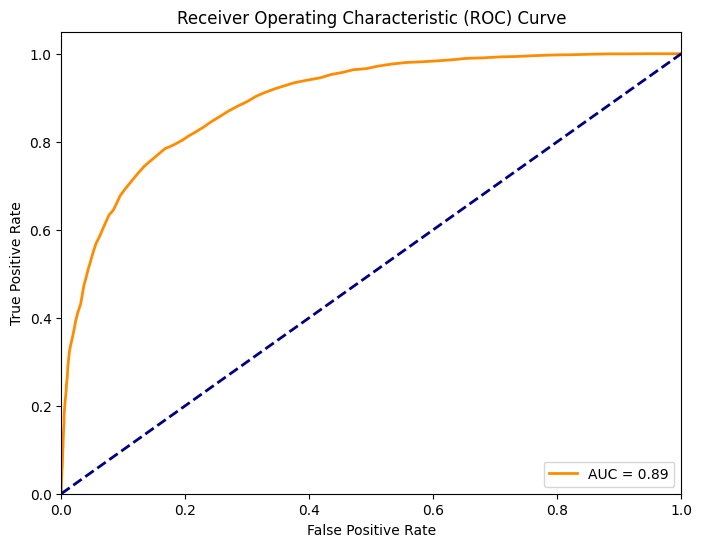

In [69]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, probabilities)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'random_state': [42]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='roc_auc', cv=5)

grid_search.fit(train_trans, y_train)

best_params = grid_search.best_params_
print("Najlepsze hiperparametry:", best_params)

results = pd.DataFrame(grid_search.cv_results_)


Najlepsze hiperparametry: {'max_depth': 20, 'n_estimators': 200, 'random_state': 42}
